In [231]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import datetime

In [232]:
df = pd.read_csv(r"C:\Users\raghvendra\Desktop\Supply Chain Dataset.csv",encoding='ANSI')

In [233]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [235]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


<AxesSubplot:>

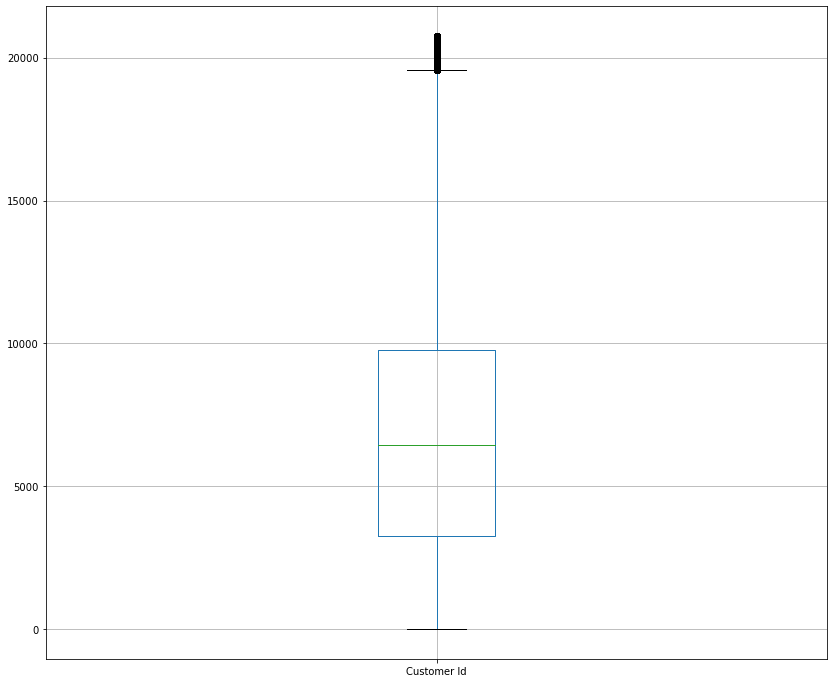

In [236]:
df.boxplot(column=['Customer Id'])

In [237]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [238]:
df = df [['Days for shipping (real)', 'Days for shipment (scheduled)','Benefit per order','Delivery Status','Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country','Customer State', 'Customer Zipcode',
        'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id',
        'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]

In [239]:
import matplotlib.pyplot as  plt

In [240]:
plt.rcParams['figure.figsize'] = 14,12

In [241]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Customer Zipcode,Department Id,Order Customer Id,Order Id,Order Item Cardprod Id,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.401415,-0.000348,0.000112,-0.001631,0.003432,-0.001711,-0.000859,...,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.005101,-0.000859,-0.000348,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,-0.369352,-0.000367,-0.003019,-0.000262,0.000899,-0.001878,-0.000431,...,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000185,-0.000431,-0.000367,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,-0.003727,0.031889,0.002235,0.031442,0.009354,0.013716,0.033161,...,0.103459,0.823689,0.015696,0.131816,0.133484,1.000000,0.033161,0.031889,0.103459,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,1.000000,0.001752,0.003148,0.001077,0.001484,-0.001293,0.001490,...,-0.002175,-0.002316,-0.000139,-0.003564,-0.003791,-0.003727,0.001490,0.001752,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.001752,1.000000,0.002898,0.888835,0.274633,0.198496,0.991092,...,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.031889,0.991092,1.000000,0.461059,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,0.003148,0.002898,1.000000,0.002878,0.002022,-0.001210,0.003173,...,0.002191,0.003364,-0.006174,-0.001490,-0.001304,0.002235,0.003173,0.002898,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.001077,0.888835,0.002878,1.000000,0.136897,0.106757,0.906117,...,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.031442,0.906117,0.888835,0.446743,NaN
Order Customer Id,0.003432,0.000899,0.009354,0.001484,0.274633,0.002022,0.136897,1.000000,0.204821,0.228039,...,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.009354,0.228039,0.274633,0.111118,NaN
Order Id,-0.001711,-0.001878,0.013716,-0.001293,0.198496,-0.001210,0.106757,0.204821,1.000000,0.163416,...,0.115324,0.002760,-0.087073,0.079835,0.079000,0.013716,0.163416,0.198496,0.115324,NaN
Order Item Cardprod Id,-0.000859,-0.000431,0.033161,0.001490,0.991092,0.003173,0.906117,0.228039,0.163416,1.000000,...,0.480288,-0.001784,-0.312555,0.238789,0.236367,0.033161,1.000000,0.991092,0.480288,NaN


In [242]:
df.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order State',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [243]:
df.describe().columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Late_delivery_risk', 'Category Id',
       'Customer Zipcode', 'Department Id', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Card Id',
       'Product Category Id', 'Product Price', 'Product Status'],
      dtype='object')

In [244]:
df

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer State,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,PR,...,91.250000,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,PR,...,-249.089996,Rajastán,PENDING,1360,73,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,CA,...,-247.779999,Rajastán,CLOSED,1360,73,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,CA,...,22.860001,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,PR,...,134.210007,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,NY,...,40.000000,Shanghái,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,CA,...,-613.770019,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,CT,...,141.110001,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,PR,...,186.229996,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [245]:
df.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order State',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [246]:
X = df[['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order State',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)']].values

In [247]:
Y = df[['Shipping Mode']].values

4TH QUESTION

In [248]:
df2 =df[['Product Name','Sales', 'order date (DateOrders)']]

In [249]:
df2[df2['Product Name'].str.contains('Nike')]

,Product Name,Sales,order date (DateOrders)
50,Nike Men's Dri-FIT Victory Golf Polo,100.000000,3/30/2016 4:37
52,Nike Men's Dri-FIT Victory Golf Polo,100.000000,11/28/2016 1:18
53,Nike Men's Dri-FIT Victory Golf Polo,100.000000,12/31/2016 15:47
54,Nike Men's Dri-FIT Victory Golf Polo,100.000000,10/25/2015 6:24
59,Nike Men's Free 5.0+ Running Shoe,299.970001,10/4/2016 22:55
...,...,...,...
179604,Nike Men's Free 5.0+ Running Shoe,499.950012,3/31/2017 1:39
179605,Nike Men's Free 5.0+ Running Shoe,499.950012,2/10/2017 6:27
179606,Nike Men's Free 5.0+ Running Shoe,499.950012,6/13/2017 2:57
179607,Nike Men's Free 5.0+ Running Shoe,499.950012,4/14/2015 5:59


In [250]:
y = df2[df2['Product Name'].str.contains('Nike')]
y

,Product Name,Sales,order date (DateOrders)
50,Nike Men's Dri-FIT Victory Golf Polo,100.000000,3/30/2016 4:37
52,Nike Men's Dri-FIT Victory Golf Polo,100.000000,11/28/2016 1:18
53,Nike Men's Dri-FIT Victory Golf Polo,100.000000,12/31/2016 15:47
54,Nike Men's Dri-FIT Victory Golf Polo,100.000000,10/25/2015 6:24
59,Nike Men's Free 5.0+ Running Shoe,299.970001,10/4/2016 22:55
...,...,...,...
179604,Nike Men's Free 5.0+ Running Shoe,499.950012,3/31/2017 1:39
179605,Nike Men's Free 5.0+ Running Shoe,499.950012,2/10/2017 6:27
179606,Nike Men's Free 5.0+ Running Shoe,499.950012,6/13/2017 2:57
179607,Nike Men's Free 5.0+ Running Shoe,499.950012,4/14/2015 5:59


In [251]:
y = pd.DatetimeIndex(y['order date (DateOrders)']).year

In [252]:
y.value_counts()

2016    20858
2015    20758
2017    15693
Name: order date (DateOrders), dtype: int64

2ND QUESTION

In [253]:
df3 = df[['Order Country', 'Order Status']]

In [254]:
A = dict(df3[df3['Order Status'].str.contains('SUSPECTED_FRAUD')].value_counts())

In [255]:
df3[df3['Order Status'].str.contains('SUSPECTED_FRAUD')].value_counts().max

<bound method Series.max of Order Country    Order Status   
Estados Unidos   SUSPECTED_FRAUD    573
Francia          SUSPECTED_FRAUD    362
México           SUSPECTED_FRAUD    317
Alemania         SUSPECTED_FRAUD    227
Australia        SUSPECTED_FRAUD    197
                                   ... 
Costa de Marfil  SUSPECTED_FRAUD      1
Jamaica          SUSPECTED_FRAUD      1
Georgia          SUSPECTED_FRAUD      1
Benín            SUSPECTED_FRAUD      1
Bangladés        SUSPECTED_FRAUD      1
Length: 102, dtype: int64>

In [261]:
#3RD QUESTION

In [256]:
df[['Order Item Discount Rate','Product Name']].max()

Order Item Discount Rate                                0.25
Product Name                insta-bed Neverflat Air Mattress
dtype: object

5TH QUESTION

In [257]:
df5 = df[['Days for shipping (real)', 'Days for shipment (scheduled)','Order Status']]

In [258]:
df6 = df5[df5['Order Status'].str.contains('COMPLETE')]

In [259]:
df7 = df6.loc[df6['Days for shipping (real)'] > df6['Days for shipment (scheduled)']]

In [271]:
df7

,Days for shipping (real),Days for shipment (scheduled),Order Status
6,2,1,COMPLETE
13,2,1,COMPLETE
15,2,1,COMPLETE
18,2,1,COMPLETE
25,6,2,COMPLETE
...,...,...,...
180479,6,4,COMPLETE
180499,4,2,COMPLETE
180508,4,2,COMPLETE
180512,6,4,COMPLETE


In [272]:
df7.value_counts()

Days for shipping (real)  Days for shipment (scheduled)  Order Status
2                         1                              COMPLETE        9307
5                         4                              COMPLETE        7065
6                         4                              COMPLETE        7022
3                         2                              COMPLETE        2492
4                         2                              COMPLETE        2457
6                         2                              COMPLETE        2232
5                         2                              COMPLETE        2120
1                         0                              COMPLETE        1504
dtype: int64

In [262]:
df8 = df[['Order Country','Order City','Order Status']]

In [263]:
df9 = df8[df8['Order Status'].str.contains('PENDING')]

In [267]:
df10 = df8[df8['Order Country'].str.contains('INDIA')]

In [270]:
df11 = df10.loc[df10['Order City'] = df9['PENDING']]

SyntaxError: invalid syntax (<ipython-input-270-722e2b56d7ad>, line 1)